In [62]:
#import lib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pandas as pd
import seaborn as sns
import pickle

In [45]:
# read file into pandas using a relative path
path = 'sms.tsv'
sms = pd.read_table(path, header=None, names=['label', 'message'])


C:\Users\hp\Conda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# examine the shape
sms.shape

(5572, 2)

In [47]:
# examine the first 10 rows
print(sms.head(10))
# examine the last 10 rows
print(sms.tail(10))

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...
     label                                            message
5562   ham  Ok lor... Sony ericsson salesman... I ask shuh...
5563   ham                                Ard 6 like dat lor.
5564   ham  Why don't you wait 'til at least wednesday to ...
5565   ham                                       Huh y lei...
5566  spam  REMINDER FROM O2: To get 2.50

ham     4825
spam     747
Name: label, dtype: int64


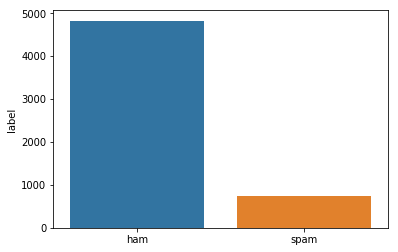

In [48]:
# # Class Distribution
class_dist = sms.label.value_counts()
print(class_dist)
sns.barplot(class_dist.index,class_dist)

In [49]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

# check that the conversion worked
sms.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [50]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.message
y = sms.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [51]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


## LabelEncoder ( CountVectorizer )

In [52]:
# instantiate the vectorizer
vect = CountVectorizer(stop_words=['call','you','the','ok','my','get'])


In [53]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train) # learn data
X_train_dtm = vect.transform(X_train) #transform data


In [54]:
# examine the document-term matrix
X_train_dtm.toarray()
pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm.toarray()
pd.DataFrame(X_test_dtm.toarray(), columns=vect.get_feature_names())

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Naive Bayes model


In [56]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [57]:
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [83]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
print(y_pred_class.shape)

(1393,)


In [59]:
# calculate accuracy of class predictions
accuracy = metrics.accuracy_score(y_test, y_pred_class)
print(accuracy)

0.9870782483847811


In [60]:
# print the confusion matrix
CM = metrics.confusion_matrix(y_test, y_pred_class)
print(CM)

[[1203    5]
 [  13  172]]


### saving the model and the vectorizers

In [68]:
# save the models
filename = '_model.pkl'
with open(filename, 'wb') as fout:
    pickle.dump((vect, nb), fout)

## Making predictions on new data

### loading the model and the vectorizers for use

In [77]:
with open(filename, 'rb') as f:
    vect_, nb_ = pickle.load(f)

In [84]:
msg = ['u dun say so early hor u c already then say i dont think he goes to usf he lives aroun.']

In [85]:
new_message_dtm = vect_.transform(msg)
new_message_dtm.toarray()
pd.DataFrame(new_message_dtm.toarray(), columns=vect_.get_feature_names())

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
y_pred_class = nb.predict(new_message_dtm)
print(y_pred_class)

[0]


In [87]:
if y_pred_class[0] == 1:
    print("This is a spam email")
else:
    print("This is not a spam email")

This is not a spam email
